## General Spectral Analysis of Sampled Signals

This partm analyzes the **sampled spectrum** of a signal defined by its **sinusoidal components** and DC term.  

- You provide the **frequencies and amplitudes** of each component, along with the **sampling frequency** and **LPF cutoff**.  
- The algorithm computes the **bilateral spectrum**, shows **aliasing effects** if they occur, and applies an **ideal low-pass filter** to recover the signal.  
- Plots are generated for both the **sampled signal spectrum** and the **recovered signal after LPF**, keeping amplitudes correct and highlighting all relevant features.


SPECTRAL ANALYSIS
Sampling frequency: fs = 8000 Hz
Max signal frequency: fmax = 6000 Hz
Aliasing will occur!


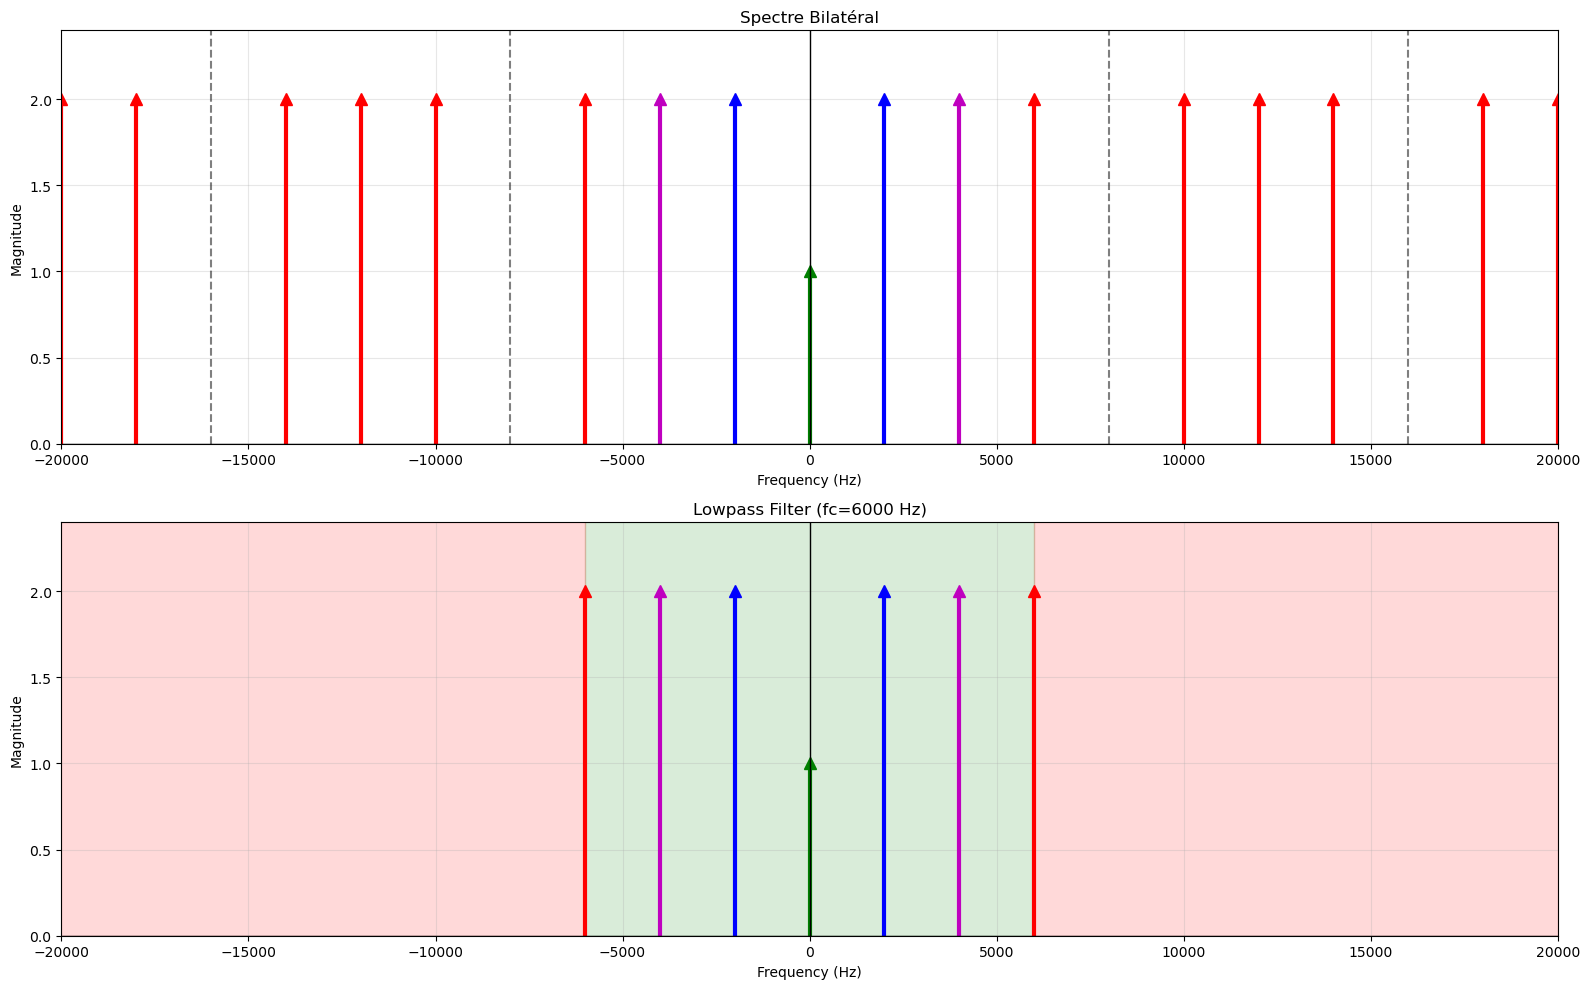


Frequencies in sampled signal (bilateral):
   -20000 Hz : amplitude = 2.00
   -18000 Hz : amplitude = 2.00
   -14000 Hz : amplitude = 2.00
   -12000 Hz : amplitude = 2.00
   -10000 Hz : amplitude = 2.00
    -6000 Hz : amplitude = 2.00
    -4000 Hz : amplitude = 2.00
    -2000 Hz : amplitude = 2.00
        0 Hz : amplitude = 1.00
     2000 Hz : amplitude = 2.00
     4000 Hz : amplitude = 2.00
     6000 Hz : amplitude = 2.00
    10000 Hz : amplitude = 2.00
    12000 Hz : amplitude = 2.00
    14000 Hz : amplitude = 2.00
    18000 Hz : amplitude = 2.00
    20000 Hz : amplitude = 2.00

Frequencies passing LPF (|f| <= 6000 Hz):
    -6000 Hz : amplitude = 2.00
    -4000 Hz : amplitude = 2.00
    -2000 Hz : amplitude = 2.00
        0 Hz : amplitude = 1.00
     2000 Hz : amplitude = 2.00
     4000 Hz : amplitude = 2.00
     6000 Hz : amplitude = 2.00


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

def spectral_analysis(signal_components, fs, fc_lpf, max_plot_freq=20000):
    """
    Spectral analysis for any sum-of-sinusoids signal.
    
    Parameters:
    - signal_components: list of tuples [(f, A), ...] f in Hz, A amplitude (f=0 for DC)
    - fs: Sampling frequency (Hz)
    - fc_lpf: Lowpass filter cutoff (Hz)
    - max_plot_freq: maximum frequency for plotting
    """
    fmax = max([abs(f) for f, A in signal_components])
    print("="*80)
    print("SPECTRAL ANALYSIS")
    print("="*80)
    print(f"Sampling frequency: fs = {fs} Hz")
    print(f"Max signal frequency: fmax = {fmax} Hz")
    print(f"{'Aliasing will occur!' if fs < 2*fmax else 'No aliasing'}")
    
    # ==============================
    # Sampled signal: bilateral spectrum
    # ==============================
    n_max = int(np.ceil(max_plot_freq / fs))
    freq_dict_bi = defaultdict(float)
    
    for f_orig, amp in signal_components:
        if f_orig == 0:  # DC: no replication
            freq_dict_bi[0] = amp
        else:
            for n in range(-n_max, n_max+1):
                for sign in [+1, -1]:
                    f_alias = n*fs + sign*f_orig
                    if abs(f_alias) <= max_plot_freq:
                        freq_dict_bi[f_alias] += amp/2  # amplitude split ±f

    freqs_bi = sorted(freq_dict_bi.keys())
    mags_bi = [freq_dict_bi[f] for f in freqs_bi]
    
    # Colors for plotting
    colors_bi = []
    orig_freqs = [f for f, A in signal_components if f != 0]
    color_list = ['b','m','r','c','k','orange']
    for f in freqs_bi:
        if f == 0:
            colors_bi.append('g')
        else:
            closest = min(orig_freqs, key=lambda x: abs(x - abs(f)))
            idx = orig_freqs.index(closest)
            colors_bi.append(color_list[idx % len(color_list)])
    
    # ==============================
    # Plot bilateral spectrum
    # ==============================
    fig, ax = plt.subplots(2,1, figsize=(16,10))
    ax1 = ax[0]
    for f, m, c in zip(freqs_bi, mags_bi, colors_bi):
        ax1.vlines(f, 0, m, colors=c, linewidth=3)
        ax1.plot(f, m, marker='^', color=c, markersize=8)
    
    # Multiples of fs (only for bilateral spectrum)
    for n in range(-n_max, n_max+1):
        if n != 0:
            ax1.axvline(n*fs, color='k', linestyle='--', alpha=0.5)
    
    ax1.axhline(0, color='k', linewidth=1)
    ax1.axvline(0, color='k', linewidth=1)
    ax1.set_xlim(-max_plot_freq, max_plot_freq)
    ax1.set_ylim(0, max(mags_bi)*1.2)
    ax1.set_xlabel('Frequency (Hz)')
    ax1.set_ylabel('Magnitude')
    ax1.set_title('Spectre Bilatéral')
    ax1.grid(True, alpha=0.3)
    
    # ==============================
    # Apply Lowpass Filter
    # ==============================
    freq_dict_lpf = {}
    for f, m in freq_dict_bi.items():
        if abs(f) <= fc_lpf:
            freq_dict_lpf[f] = m
    
    freqs_lpf = sorted(freq_dict_lpf.keys())
    mags_lpf = [freq_dict_lpf[f] for f in freqs_lpf]
    colors_lpf = []
    for f in freqs_lpf:
        if f == 0:
            colors_lpf.append('g')
        else:
            closest = min(orig_freqs, key=lambda x: abs(x - abs(f)))
            idx = orig_freqs.index(closest)
            colors_lpf.append(color_list[idx % len(color_list)])
    
    # ==============================
    # Plot LPF result (no fs lines)
    # ==============================
    ax2 = ax[1]
    for f, m, c in zip(freqs_lpf, mags_lpf, colors_lpf):
        ax2.vlines(f, 0, m, colors=c, linewidth=3)
        ax2.plot(f, m, marker='^', color=c, markersize=8)
    
    # LPF passband shading
    ax2.axvspan(-fc_lpf, fc_lpf, alpha=0.15, color='green')
    ax2.axvspan(-max_plot_freq, -fc_lpf, alpha=0.15, color='red')
    ax2.axvspan(fc_lpf, max_plot_freq, alpha=0.15, color='red')
    
    ax2.axhline(0, color='k', linewidth=1)
    ax2.axvline(0, color='k', linewidth=1)
    ax2.set_xlim(-max_plot_freq, max_plot_freq)
    ax2.set_ylim(0, max(mags_lpf)*1.2)
    ax2.set_xlabel('Frequency (Hz)')
    ax2.set_ylabel('Magnitude')
    ax2.set_title(f'Lowpass Filter (fc={fc_lpf} Hz)')
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # ==============================
    # Print results
    # ==============================
    print("\nFrequencies in sampled signal (bilateral):")
    for f, m in zip(freqs_bi, mags_bi):
        print(f"  {f:7.0f} Hz : amplitude = {m:.2f}")
    
    print(f"\nFrequencies passing LPF (|f| <= {fc_lpf} Hz):")
    for f, m in zip(freqs_lpf, mags_lpf):
        print(f"  {f:7.0f} Hz : amplitude = {m:.2f}")

# ==============================
# Exemple d'utilisation
# ==============================
# Signal: x(t) = 1 + 1*cos(2π*2000*t) + 2*cos(2π*4000*t) + 3*cos(2π*6000*t)
components = [(0,1), (2000,1), (4000,2), (6000,3)]
fs = 8000
fc_lpf = 6000
spectral_analysis(components, fs, fc_lpf, max_plot_freq=20000)